In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from astropy.table import Table
import json
from astropy.cosmology import FlatLambdaCDM as FLCDM 
from pathlib import Path

In [52]:
nickel_masses = [0.1239, 0.0441, 0.1105, 0.0684] 
sp14_masses = [0.1449, 0.0556, 0.110, 0.0802]

plateau_length = [88.04875493948131, 60.961046364568105, 91.10672254884823, 107.6711255152417]
upper_x = [1.3649329877384133, 0.4143178633084119, 1.4331253507989459, 0.8758284790054347]
lower_x = [1.2518999287058818,0.37478178341954305, 1.0693672610451301, 0.7930402759757413]

upper_y = [0.0024, 0.0004, 0.0028, 0.0017]
lower_y = [0.0021, 0.0004, 0.0024, 0.00170]
asymmetric_y = [lower_y, upper_y]
asymmetric_x = [lower_x, upper_x]

In [53]:


# plt.figure()
# plt.errorbar(plateau_length, nickel_masses, xerr=asymmetric_x, yerr=asymmetric_y, fmt = 'o', label = 'Valenti+2016 $^{56}Ni$')
# plt.plot(plateau_length, sp14_masses, color = 'r', label = 'Spiro14 $^{56}Ni $', marker = 'o', linestyle = 'None') 

# plt.text(61, 0.045, '2020jfo')
# plt.text(87, 0.13, '2020hgw')
# plt.text(93, 0.11, '2020jww')
# plt.text(105, 0.07, '2020rth')
# plt.title('$^{56}$Ni vs Plateau Length')
# plt.xlabel('Plateau Length (days)')
# plt.ylabel('$^{56}$Ni Mass $(M_\odot)$')
# plt.legend(loc = 2)

### CURVEPOP SNE 
## 2003gd 
Anderson+2014, Galbany+2016, Fara,+2014, Hendry+2005b, Van Dyk+2003 
## 2004A 
Hendry+2006, Tsvetkov 2008 
## 2004et 
Maguire+2010 
## 2005cs 
Pastorello+2009
## 2006my 
Maguire+2010
## 2008bk
Anderson+2014, Van Dyk+2012 
## 2009md 
Fraser+2011 
## 2012A
Tomasella+2013 
## 2012aw 
Bose & Kumar 2013 
## 2012ec 
Smartt+ 2015 
## 2013ej 
Yuan+2016, Huang+2015


### NOTE 
2003gd, 2008bk do not have plateau estimates from Anderson+14 

In [54]:
#CURVEPOP SNe 
#2003gd, 2004A, 2004et, 2005cs, 2006my, 2008bk, 2009md, 2012A, 2012aw, 2012ec, 2013ej 
#2004A 80d +25, -5 
CURVE_tpt = [90, 80, 100, 110, 120, 100, 120, 85, 96, 90, 50]
CURVE_err = [10, 25, 0, 10, 20, 0, 0, 5, 11, 0, 0]
CURVE_uncons_ni = [10.0, 31.6, 31.6, 3.2, 17.7, 10.0, 3.2, 3.2, 56.2, 17.8, 100]
CURVE_uncons = np.array(CURVE_uncons_ni) * (10 ** (-3))
CURVE_uncons
uncons_err_upper = [3.3, 68.4, 10.5, 1.1, 82.2, 4.4, 3.3, 4.3, 1.1, 18.8, 5.9, 90]
uncons_err_lower = [2.5, 7.9, 7.9, 0.8, 4.4, 5.8, 1.8, 1.8, 14.1, 10.3,90]
uncons_upper = np.array(uncons_err_upper) * (10 **(-3))
uncons_lower = np.array(uncons_err_lower) * (10 ** (-3))
CURVE_cons_ni = [10.0, 31.6, 56.2, 3.2, 17.8, 10.0, 3.16, 10.0, 56.2, 17.8, 100]
CURVE_cons = np.array(CURVE_cons_ni) * (10 **(-3))
cons_err_upper = [3.3, 68.4, 18.8, 1.1, 82.2, 3.3, 4.3, 3.3, 18.8, 5.9, 82.2]
cons_err_lower = [2.5, 7.9, 14.1, 0.8, 4.4, 2.5, 1.8, 5.8, 14.1, 4.4, 82.2]
cons_upper = np.array(cons_err_upper)  * (10**(-3))
cons_lower = np.array(cons_err_lower) * (10 ** (-3)) 
print(CURVE_cons)

[0.01    0.0316  0.0562  0.0032  0.0178  0.01    0.00316 0.01    0.0562
 0.0178  0.1    ]


In [55]:
# plt.errorbar(plateau_length, nickel_masses, xerr=asymmetric_x, yerr=asymmetric_y, fmt = 'o', label = 'Valenti+2016 $^{56}Ni$')
# plt.plot(plateau_length, sp14_masses, color = 'r', label = 'Spiro14 $^{56}Ni $', marker = 'o', linestyle = 'None') 
# plt.errorbar(CURVE_tpt, CURVE_uncons, xerr = CURVE_err, yerr = uncons_lower, fmt = 'o', label = r'Eldridge+2019, unconstrained')
# plt.title('$^{56}$Ni vs Plateau Length')
# plt.xlabel('Plateau Length (days)')
# plt.ylabel('$^{56}$Ni Mass $(M_\odot)$')

# plt.text(63, 0.045, '2020jfo')
# plt.text(87, 0.13, '2020hgw')
# plt.text(93, 0.11, '2020jww')
# plt.text(109, 0.07, '2020rth')


# plt.legend(loc = 1)

In [56]:
# plt.errorbar(plateau_length, nickel_masses, xerr=asymmetric_x, yerr=asymmetric_y, fmt = 'o', label = 'Valenti+2016 $^{56}Ni$')
# plt.plot(plateau_length, sp14_masses, color = 'r', label = 'Spiro14 $^{56}Ni $', marker = 'o', linestyle = 'None') 
# plt.errorbar(CURVE_tpt, CURVE_cons, xerr = CURVE_err, yerr = cons_lower, fmt = 'o', label = r'Eldridge+2019, constrained')
# plt.title('$^{56}$Ni vs Plateau Length')
# plt.xlabel('Plateau Length (days)')
# plt.ylabel('$^{56}$Ni Mass $(M_\odot)$')
# plt.text(63, 0.045, '2020jfo')
# plt.text(87, 0.13, '2020hgw')
# plt.text(93, 0.11, '2020jww')
# plt.text(109, 0.07, '2020rth')
# plt.legend(loc = 1)

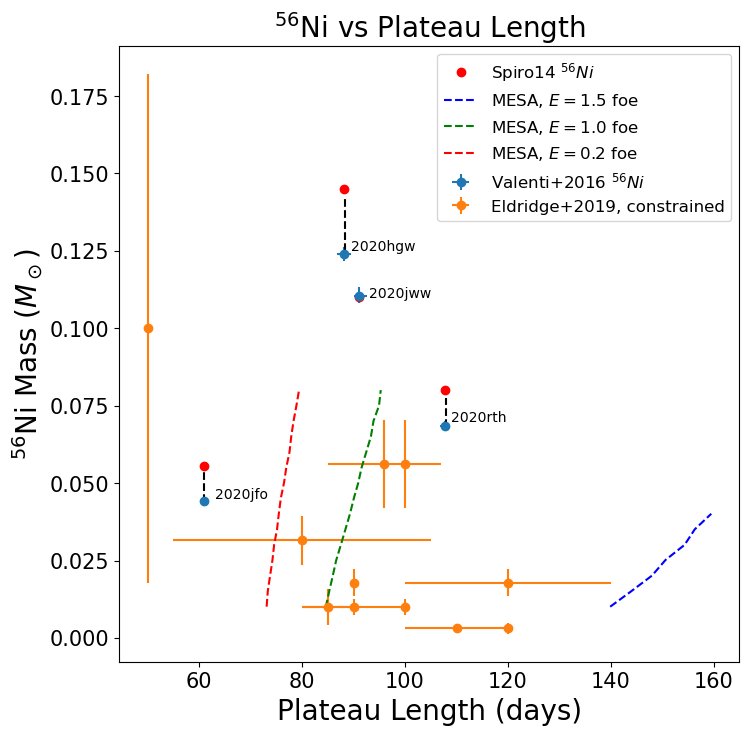

In [57]:
plt.figure(figsize=(8,8))
#plt.errorbar(CURVE_tpt, CURVE_uncons, xerr = CURVE_err, yerr = uncons_lower, fmt = 'o', label = r'Eldridge+2019, unconstrained')
plt.errorbar(plateau_length, nickel_masses, xerr=asymmetric_x, yerr=asymmetric_y, fmt = 'o', label = 'Valenti+2016 $^{56}Ni$')
plt.plot(plateau_length, sp14_masses, color = 'r', label = 'Spiro14 $^{56}Ni $', marker = 'o', linestyle = 'None') 
plt.errorbar(CURVE_tpt, CURVE_cons, xerr = CURVE_err, yerr = cons_lower, fmt = 'o', label = r'Eldridge+2019, constrained') 
# MESA theoretical data from: https://www.aanda.org/articles/aa/pdf/2020/10/aa38393-20.pdf
# Odd columns are Ni-56 and even columns are plateau duration
theory_15foe=[0.010084338846297211, 139.85368598761957,
0.015095901766856039, 143.9617332583005,
0.02010740204405291, 147.9572312886888,
0.025173809227993664, 150.60213843556556,
0.03007383564261129, 154.31626336522228,
0.03508420833929318, 156.28587507034328,
0.040095270112956466, 159.49352841868316]
plateau=[dat for i,dat in enumerate(theory_15foe) if i%2==1]
nickel=[dat for i,dat in enumerate(theory_15foe) if i%2==0]

plt.plot(plateau, nickel, color='blue', linestyle='dashed',
         label='MESA, $E=1.5$ foe')

theory_1foe=[0.009886605074321146, 84.59200900393922,
0.015007574626515065, 85.26730444569499,
0.019905909670360204, 85.94259988745077,
0.025026879222554123, 86.61789532920653,
0.029980998180210355, 87.51828925154756,
0.03504643439204097, 88.41868317388858,
0.04016752923095879, 89.3190770962296,
0.045065895596484884, 90.0506471581317,
0.04996432460537294, 90.8947664603264,
0.05508529415756687, 91.57006190208216,
0.060039413115223095, 92.47045582442318,
0.06504919069996651, 93.37084974676421,
0.07005874903294312, 93.87732132808105,
0.07501296195564228, 94.946539110861,
0.08002242632357595, 95.2841868317389]
plateau=[dat for i,dat in enumerate(theory_1foe) if i%2==1]
nickel=[dat for i,dat in enumerate(theory_1foe) if i%2==0]

plt.plot(plateau, nickel, color='green', linestyle='dashed',
         label='MESA, $E=1.0$ foe')

theory_02foe=[0.01010284995975165, 73.11198649409117,
0.015056593057236202, 73.33708497467643,
0.02012177869561905, 73.78728193584693,
0.02501998845274029, 74.23747889701745,
0.03014077007484839, 74.57512661789534,
0.03509470110241879, 75.13787281935848,
0.04004850684326529, 75.47552054023637,
0.04511366115996715, 75.86944288126055,
0.050067623509218506, 76.48846370287,
0.05507715052051415, 76.93866066404053,
0.06003111286976552, 77.55768148564997,
0.06504057723769921, 77.89532920652786,
0.07005010424899487, 78.34552616769838,
0.07511535253073963, 78.90827236916151,
0.08006925223662904, 79.41474395047834]
plateau=[dat for i,dat in enumerate(theory_02foe) if i%2==1]
nickel=[dat for i,dat in enumerate(theory_02foe) if i%2==0]

plt.plot(plateau, nickel, color='red', linestyle='dashed',
         label='MESA, $E=0.2$ foe')
plt.plot([61, 61], [0.044, 0.0538], linestyle = 'dashed', color = 'k')
plt.plot([108, 108], [0.068, 0.0775], linestyle = 'dashed', color = 'k')
plt.plot([88.3, 88.3], [0.125, 0.142], linestyle = 'dashed', color = 'k')
plt.title('$^{56}$Ni vs Plateau Length', fontsize = 20)
plt.xlabel('Plateau Length (days)', fontsize = 20)
plt.ylabel('$^{56}$Ni Mass $(M_\odot)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.text(63, 0.045, '2020jfo')
plt.text(89.5, 0.125, '2020hgw')
plt.text(93, 0.11, '2020jww')
plt.text(109, 0.07, '2020rth')
plt.legend(loc = 1, fontsize = 'large')

Text(0.5, 1.0, '$^{56}$Ni vs Peak Luminosity')

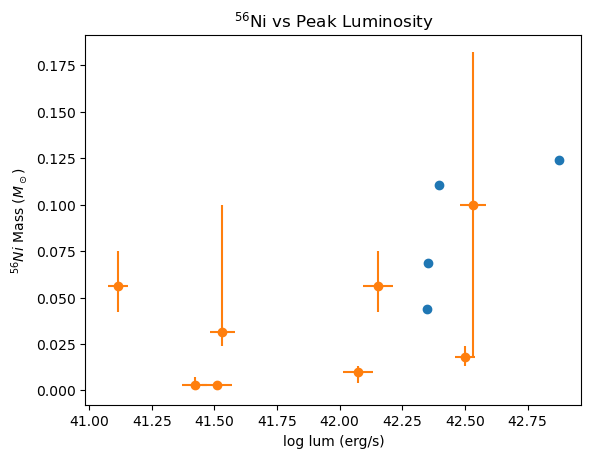

In [58]:
peak_lums = [7.499622138688114e+42, 2.224722485025017e+42, 2.4810434522392757e+42, 2.2496933248455278e+42]
peak_Ls = [np.nan, 41.531, 41.115, 41.511, np.nan, np.nan, 41.422, 42.073, 42.154, 42.502, 42.532]
errs_CURVE = [np.nan, 0.05, 0.04, 0.06, np.nan, np.nan, 0.05, 0.06, 0.06, 0.04, 0.05]

plt.figure()
plt.plot(np.log10(peak_lums), nickel_masses, marker = 'o', linestyle = 'none')
plt.errorbar(peak_Ls, CURVE_cons, xerr=errs_CURVE, yerr=[cons_lower, cons_upper], fmt='o')
plt.xlabel('log lum (erg/s)')
plt.ylabel('$^{56}Ni$ Mass ($M_\odot$)')
plt.title('$^{56}$Ni vs Peak Luminosity')

In [59]:
hgw_ni = 0.1239 
jfo_ni = 0.0441
jww_ni = 0.1105
rth_ni = 0.0684 

Text(0.5, 1.0, '56Ni vs Progenitor Mass')

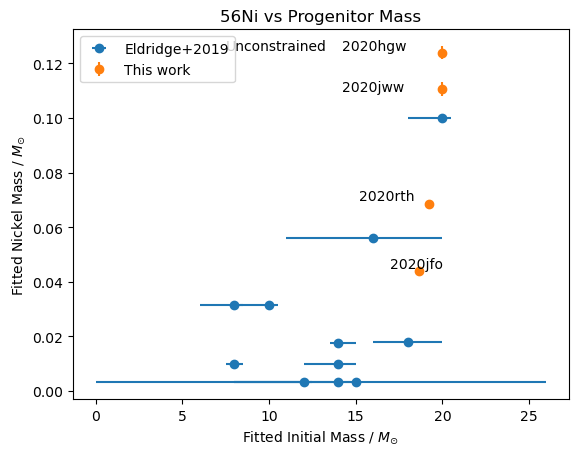

In [60]:
uncons_init = [8.0, 8.0, 10.0, 12.0, 14.0, 14.0, 14.0, 15.0, 16.0, 18.0, 20.0]
uncons_upper_init = [.5, .5, .5, .5, 1,1,1, 11, 4, 2, .5]
uncons_lower_init = [.5, 2, 2, 12, .5, 2, 6, 7, 5, 2, 2]
uncons_asym_init = [uncons_lower_init, uncons_upper_init]

hgw_uncons = np.interp(hgw_ni, CURVE_uncons, uncons_init)
jfo_uncons = np.interp(jfo_ni, CURVE_uncons, uncons_init)
jww_uncons = np.interp(jww_ni, CURVE_uncons, uncons_init)
rth_uncons = np.interp(rth_ni, CURVE_uncons, uncons_init)
uncons_init_array = np.array([hgw_uncons, jfo_uncons, jww_uncons, rth_uncons])
plt.errorbar(uncons_init, CURVE_uncons, xerr = uncons_asym_init, fmt = 'o', label = 'Eldridge+2019')
plt.errorbar(uncons_init_array, nickel_masses, yerr = asymmetric_y, fmt = 'o', label = 'This work')
plt.xlabel('Fitted Initial Mass / $M_{\odot}$')
plt.ylabel('Fitted Nickel Mass / $M_{\odot}$')
plt.legend()
plt.text(7.5, 0.125, 'Unconstrained')
plt.text(17, 0.045, '2020jfo')
plt.text(14.2, 0.125, '2020hgw')
plt.text(14.2, 0.11, '2020jww')
plt.text(15.2, 0.07, '2020rth')
plt.title('56Ni vs Progenitor Mass')

hgw_cons:18.0, jfo_cons:8.0, jww_cons:18.0, rth_cons:17.231143552311437


Text(0.5, 1.0, '56Ni vs Progenitor Mass')

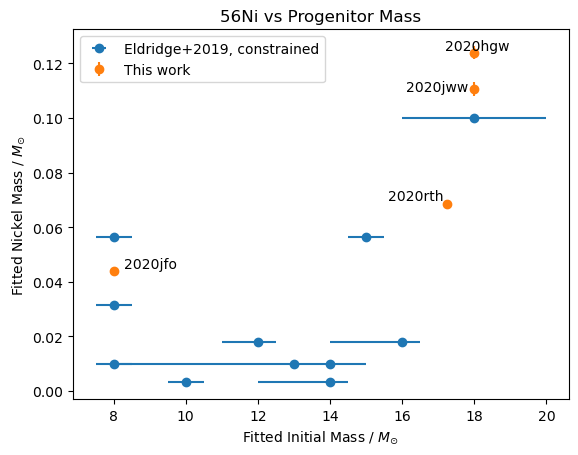

In [61]:
cons_init = [8.0, 8.0, 8.0, 10.0, 12.0, 13.0, 14.0, 14.0, 15.0, 16.0, 18.0] #Eldridge constrained progenitor masses 
cons_init_upper = [.5, .5, .5, .5, .5, .5, .5, 1, .5, .5, 2]
cons_init_lower = [.5, .5, .5, .5, 1, 5, 2, .5, .5, 2, 2]
cons_init_asym = [cons_init_lower, cons_init_upper]

hgw_cons = np.interp(hgw_ni, CURVE_cons, cons_init)
jfo_cons = np.interp(jfo_ni, CURVE_cons, cons_init)
jww_cons = np.interp(jww_ni, CURVE_cons, cons_init)
rth_cons = np.interp(rth_ni, CURVE_cons, cons_init)

print(f'hgw_cons:{hgw_cons}, jfo_cons:{jfo_cons}, jww_cons:{jww_cons}, rth_cons:{rth_cons}')

cons_init_array = np.array([hgw_cons, jfo_cons, jww_cons, rth_cons])
plt.errorbar(cons_init, CURVE_cons, xerr = cons_init_asym, fmt = 'o', label = 'Eldridge+2019, constrained')
plt.errorbar(cons_init_array, nickel_masses, yerr = asymmetric_y, fmt = 'o', label = 'This work')
plt.xlabel('Fitted Initial Mass / $M_{\odot}$')
plt.ylabel('Fitted Nickel Mass / $M_{\odot}$')
plt.text(8.3, 0.045, '2020jfo')
plt.text(17.2, 0.125, '2020hgw')
plt.text(16.1, 0.11, '2020jww')
plt.text(15.6, 0.07, '2020rth')
plt.legend()
plt.title('56Ni vs Progenitor Mass')

In [62]:
CO = pd.read_csv('CO_data.csv', names=('mass', 'nickel(log)'))
CO['nickel'] = 10**CO['nickel(log)']
CO

,mass,nickel(log),nickel
0,8.308157,0.001026,1.002364
1,8.308157,0.001144,1.002639
2,8.308157,0.001254,1.002892
3,8.338369,0.001412,1.003257
4,8.338369,0.001590,1.003668
...,...,...,...
72,20.604230,0.066009,1.164151
73,20.936556,0.067206,1.167364
74,21.359517,0.065964,1.164029
75,21.601208,0.064755,1.160794


Text(0.5, 1.0, '56Ni vs Progenitor Mass')

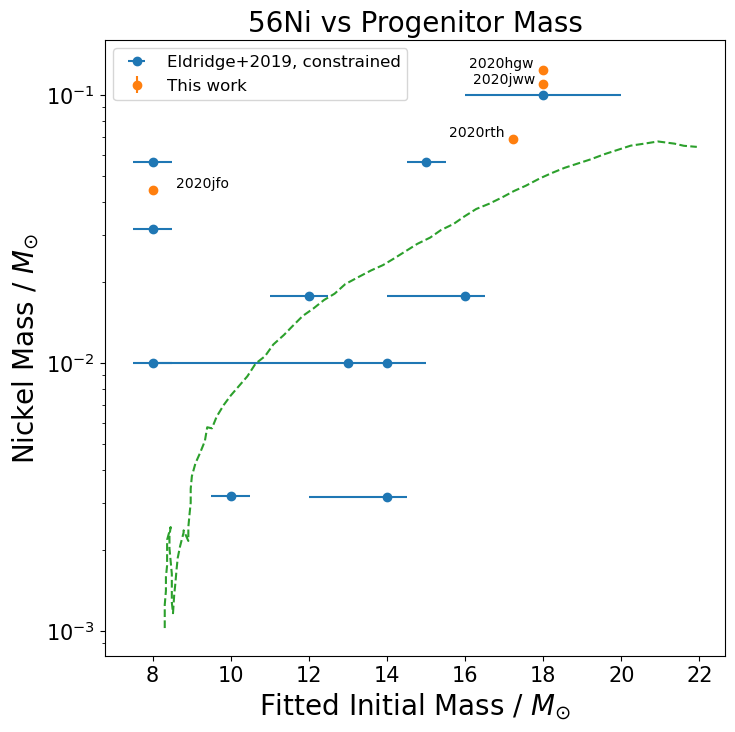

In [63]:
plt.figure(figsize=(8,8))
# plt.errorbar(uncons_init, CURVE_uncons, xerr = uncons_asym_init, fmt = 'o', label = 'Eldridge+2019, unconstrained')
plt.errorbar(cons_init, CURVE_cons, xerr = cons_init_asym, fmt = 'o', label = 'Eldridge+2019, constrained')
plt.errorbar(cons_init_array, nickel_masses, yerr = asymmetric_y, fmt = 'o', label = 'This work')
plt.plot(CO['mass'], CO['nickel(log)'], linestyle = 'dashed')
plt.yscale('log')
plt.xlabel('Fitted Initial Mass / $M_{\odot}$', fontsize = 20)
plt.ylabel('Nickel Mass / $M_{\odot}$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.text(8.6, 0.045, '2020jfo')
plt.text(16.1, 0.127, '2020hgw')
plt.text(16.2, 0.11, '2020jww')
plt.text(15.6, 0.07, '2020rth')
plt.legend(fontsize = 'large')
plt.title('56Ni vs Progenitor Mass', fontsize = 20)

In [64]:
# fig, ax1 = plt.subplots(figsize = (12,10))
# ax1.errorbar(plateau_length, nickel_masses, xerr=asymmetric_x, yerr=asymmetric_y, fmt = 'o', label = 'Valenti+2016 $^{56}Ni$')
# ax1.plot(plateau_length, sp14_masses, color = 'r', label = 'Spiro14 $^{56}Ni $', marker = 'o', linestyle = 'None') 
# ax1.errorbar(CURVE_tpt, CURVE_uncons, xerr = CURVE_err, yerr = uncons_lower, fmt = 'o', label = r'Eldridge+2019, unconstrained')
# plt.title('$^{56}$Ni vs Plateau Length', fontsize = 20)
# ax1.set_xlabel('Plateau Length (days)', fontsize = 20)
# ax1.set_ylabel('$^{56}$Ni Mass $(M_\odot)$', fontsize = 20)
# ax1.tick_params(axis='both', labelsize = 15)
# ax1.text(63, 0.045, '2020jfo')
# ax1.text(87, 0.13, '2020hgw')
# ax1.text(93, 0.11, '2020jww')
# ax1.text(109, 0.07, '2020rth')
# ax1.legend(loc = 1, fontsize = 'large')
# ax2 = ax1.twinx()
# ax2.errorbar(plateau_length, cons_init_array, xerr = asymmetric_x, fmt = 'o')
# ax2.set_ylabel('Fitted Initial Mass / $M_{\odot}$', fontsize = 20)
# # ax2.tick_params(axis='y', labelsize = 15)


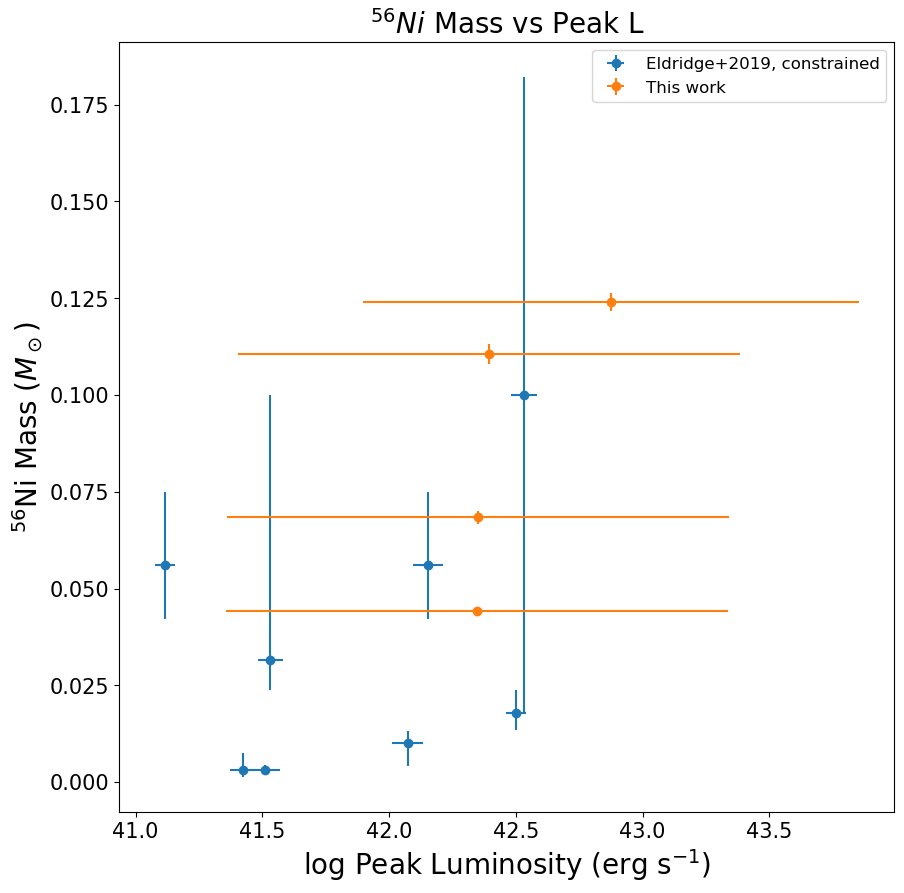

In [65]:
# gd, A, et, cs, my, bk, md, A, aw, ec, ej
peak_lums = [7.499622138688114e+42, 2.224722485025017e+42, 2.4810434522392757e+42, 2.2496933248455278e+42]
lum_errs = [0.98, 0.99, 0.99, 0.99]
CURVEPOP_peak_L = [np.nan, 41.531, 41.115, 41.511, np.nan, np.nan, 41.422, 42.073, 42.154, 42.502, 42.532]
CURVEPOP_Lerrs = [np.nan, 0.05, 0.04, 0.06, np.nan, np.nan, 0.05, 0.06, 0.06, 0.04, 0.05]

figL, axL1 = plt.subplots(figsize = (10,10))
axL1.errorbar(CURVEPOP_peak_L, CURVE_cons, xerr = CURVEPOP_Lerrs, yerr = [cons_lower, cons_upper], marker = 'o', linestyle = 'none', label = 'Eldridge+2019, constrained')
axL1.errorbar(np.log10(peak_lums), nickel_masses, xerr = lum_errs, yerr = asymmetric_y, marker = 'o', linestyle = 'none', label = 'This work')
axL1.set_xlabel('log Peak Luminosity (erg s$^{-1}$)', fontsize = 20)
axL1.set_ylabel('$^{56}$Ni Mass $(M_\odot)$', fontsize = 20)
axL1.set_title('$^{56}Ni$ Mass vs Peak L', fontsize = 20)
axL1.tick_params(axis='both', labelsize = 15)
axL1.legend(fontsize = 'larger')

In [66]:
peak_lums = [7.499622138688114e+42, 2.224722485025017e+42, 2.4810434522392757e+42, 2.2496933248455278e+42]
log_peak_lums = np.log10(peak_lums)
print(log_peak_lums)

[42.87503938 42.34727584 42.39463437 42.35212332]


2003gd - discovered really late (100+d) 

2004A -26d later (eqn3 of Hendry+2006)

2004et - log(L) = 42.5 

2005cs - log(L) = 41.8

2006my -discovered months after explosion

2008bk - log(Lbol) = 41.6 

2009md - log(L) = 41.5 (~25d after explosion)
host gal: NGC 3389 

2012A- log(L) = 42.2 

2012aw - log(L) = 42.15

2012ec - log(L) = 42.18 

2013ej - log(L) = 42.7 

2003gd - discovered 100+ days after explosion 

2006my - discovered months after explosion 

2004A - 26d after explosion, eqn3 of Hendry+2006 has V-band to bol Lum conversion 

2009md -  25d after explosion 

In [67]:
#global and local sfr, ssfr, mass, age, local semimajor axis, local semiminor axis, redshift, 
# global and local stellar metallicity, gas metallicity 
g_sfr = {} 
l_sfr = {}
g_ssfr = {}
l_ssfr = {}
g_mass = {}
l_mass = {}
g_age = {}
l_age = {}
l_a = {}
l_b = {} 
redshift = {}
g_sz = {}
l_sz = {}
g_gz = {}
l_gz = {}

In [68]:
def get_blast(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    SN = data['transient_name']
    host_z = data['host_redshift']
    redshift[SN] = host_z
    #grab global sfr + errors 
    gsfr16 = data['global_aperture_host_log_sfr_16']
    gsfr50 = data['global_aperture_host_log_sfr_50']
    gsfr84 = data['global_aperture_host_log_sfr_84']
    g_sfr[SN] = [gsfr16, gsfr50, gsfr84]
    
    #grab local sfr + errors 
    lsfr16 = data['local_aperture_host_log_sfr_16']
    lsfr50 = data['local_aperture_host_log_sfr_50']
    lsfr84 = data['local_aperture_host_log_sfr_84']  
    l_sfr[SN] = [lsfr16, lsfr50, lsfr84]
    
    #grab global ssfr + errors 
    gssfr16 = data['global_aperture_host_log_ssfr_16']
    gssfr50 = data['global_aperture_host_log_ssfr_50']
    gssfr84 = data['global_aperture_host_log_ssfr_84']  
    g_ssfr[SN] = [gssfr16, gssfr50, gssfr84]
    
    #grab local ssfr + errors 
    lssfr16 = data['local_aperture_host_log_ssfr_16']
    lssfr50 = data['local_aperture_host_log_ssfr_50']
    lssfr84 = data['local_aperture_host_log_ssfr_84'] 
    l_ssfr[SN] = [lssfr16, lssfr50, lssfr84]
    
    #grab global mass 
    gm16 = data['global_aperture_host_log_mass_16']
    gm50 = data['global_aperture_host_log_mass_50']
    gm84 = data['global_aperture_host_log_mass_84']
    g_mass[SN] = [gm16, gm50, gm84]
    
    #grab local mass 
    lm16 = data['local_aperture_host_log_mass_16']
    lm50 = data['local_aperture_host_log_mass_50']
    lm84 = data['local_aperture_host_log_mass_84']
    l_mass[SN] = [lm16, lm50, lm84]
    
    #grab global age 
    gage16 = data['global_aperture_host_log_age_16']
    gage50 = data['global_aperture_host_log_age_50']
    gage84 = data['global_aperture_host_log_age_84']
    g_age[SN] = [gage16, gage50, gage84]

    #grab local age 
    lage16 = data['local_aperture_host_log_age_16']
    lage50 = data['local_aperture_host_log_age_50']    
    lage84 = data['local_aperture_host_log_age_84']
    l_age[SN] = [lage16, lage50, lage84]
    
    #grab global stellar z 
    gsz16 = data['global_aperture_host_logzsol_16']
    gsz50 = data['global_aperture_host_logzsol_50']
    gsz84 = data['global_aperture_host_logzsol_84']
    g_sz[SN] = [gsz16, gsz50, gsz84]
    
    #grab local stellar z 
    lsz16 = data['local_aperture_host_logzsol_16']
    lsz50 = data['local_aperture_host_logzsol_50']
    lsz84 = data['local_aperture_host_logzsol_84']   
    l_sz[SN] = [lsz16, lsz50, lsz84]
     
    #grab global gas z 
    ggz16 = data['global_aperture_host_gas_logz_16']
    ggz50 = data['global_aperture_host_gas_logz_50']
    ggz84 = data['global_aperture_host_gas_logz_84']
    g_gz[SN] = [ggz16, ggz50, ggz84]
    
    #grab local gas z 
    lgz16 = data['global_aperture_host_gas_logz_16']
    lgz50 = data['global_aperture_host_gas_logz_50']
    lgz84 = data['global_aperture_host_gas_logz_84']    
    l_gz[SN] = [lgz16, lgz50, lgz84]
    
    #grab local minor axis 
    la= data['local_aperture_host_aperture']['semi_major_axis_arcsec']    
    l_a[SN] = la 
    
    #grab local semiminor axis        
    lb = data['local_aperture_host_aperture']['semi_minor_axis_arcsec']
    l_b[SN] = lb 

In [69]:
from pathlib import Path
for file in Path('.').glob('*.json'):
    get_blast(file)

In [70]:
g_sfr  
# l_sfr 
# g_ssfr
# l_ssfr 
# g_mass
# l_mass
# g_age
# l_age
# l_a
# l_b 
# redshift

{'2004A': [-1.26524497613557, -0.712312152638003, -0.36105276665426],
 '2005cs': [None, None, None],
 '2006my': [-0.943989193472046, -0.644020518072129, -0.36053754513032],
 '2009md': [-0.345804553874086, -0.0351719243566015, 0.205344284288772],
 '2012A': [0.172501896041789, 0.383999536702446, 0.584607821757191],
 '2012aw': [None, None, None],
 '2012ec': [0.20576852950533, 0.490265725495369, 0.761230982085752],
 '2013ej': [None, None, None],
 '2020hgw': [-0.239904489719662, 0.2779822046638, 0.681112311344142],
 '2020jfo': [None, None, None],
 '2020jww': [0.209105363947132, 0.719876895769188, 1.08794765782217],
 '2020rth': [-0.494973560357545, -0.138648917001493, 0.282355492472307]}

# SFR (global + local)

In [71]:
g_sfr_vals = [] 
g_sfr_err_hi = [] 
g_sfr_err_lo = [] 

l_sfr_vals = [] 
l_sfr_err_hi = [] 
l_sfr_err_lo = [] 

for key, value in g_sfr.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        g_sfr_vals.append(value[1])
        g_sfr_err_hi.append(value[1] - value[0])
        g_sfr_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        g_sfr_vals.append(np.nan)
        g_sfr_err_hi.append(np.nan)
        g_sfr_err_lo.append(np.nan)


for key, value in l_sfr.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        l_sfr_vals.append(value[1])
        l_sfr_err_hi.append(value[1] - value[0])
        l_sfr_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        l_sfr_vals.append(np.nan)
        l_sfr_err_hi.append(np.nan)
        l_sfr_err_lo.append(np.nan)
        

# SSFR (global + local)


In [72]:
g_ssfr_vals = [] 
g_ssfr_err_hi = [] 
g_ssfr_err_lo = [] 

l_ssfr_vals = [] 
l_ssfr_err_hi = [] 
l_ssfr_err_lo = [] 

for key, value in g_ssfr.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        g_ssfr_vals.append(value[1])
        g_ssfr_err_hi.append(value[1] - value[0])
        g_ssfr_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        g_ssfr_vals.append(np.nan)
        g_ssfr_err_hi.append(np.nan)
        g_ssfr_err_lo.append(np.nan)


for key, value in l_ssfr.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        l_ssfr_vals.append(value[1])
        l_ssfr_err_hi.append(value[1] - value[0])
        l_ssfr_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        l_ssfr_vals.append(np.nan)
        l_ssfr_err_hi.append(np.nan)
        l_ssfr_err_lo.append(np.nan)

# MASS (global + local)

In [73]:
gmass_vals = [] 
gmass_err_hi = [] 
gmass_err_lo = [] 

lmass_vals = [] 
lmass_err_hi = [] 
lmass_err_lo = [] 

for key, value in g_mass.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        gmass_vals.append(value[1])
        gmass_err_hi.append(value[1] - value[0])
        gmass_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        gmass_vals.append(np.nan)
        gmass_err_hi.append(np.nan)
        gmass_err_lo.append(np.nan)


for key, value in l_mass.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        lmass_vals.append(value[1])
        lmass_err_hi.append(value[1] - value[0])
        lmass_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        lmass_vals.append(np.nan)
        lmass_err_hi.append(np.nan)
        lmass_err_lo.append(np.nan)
        

# AGE (global + local)

In [74]:
gage_vals = [] 
gage_err_hi = [] 
gage_err_lo = [] 

lage_vals = [] 
lage_err_hi = [] 
lage_err_lo = [] 

for key, value in g_age.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        gage_vals.append(value[1])
        gage_err_hi.append(value[1] - value[0])
        gage_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        gage_vals.append(np.nan)
        gage_err_hi.append(np.nan)
        gage_err_lo.append(np.nan)


for key, value in l_age.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        lage_vals.append(value[1])
        lage_err_hi.append(value[1] - value[0])
        lage_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        lage_vals.append(np.nan)
        lage_err_hi.append(np.nan)
        lage_err_lo.append(np.nan)
        

# SOLAR METALLICITY (global + local)

In [75]:
gsz_vals = [] 
gsz_err_hi = [] 
gsz_err_lo = [] 

lsz_vals = [] 
lsz_err_hi = [] 
lsz_err_lo = [] 

for key, value in g_sz.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        gsz_vals.append(value[1])
        gsz_err_hi.append(value[1] - value[0])
        gsz_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        gsz_vals.append(np.nan)
        gsz_err_hi.append(np.nan)
        gsz_err_lo.append(np.nan)


for key, value in l_sz.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        lsz_vals.append(value[1])
        lsz_err_hi.append(value[1] - value[0])
        lsz_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        lsz_vals.append(np.nan)
        lsz_err_hi.append(np.nan)
        lsz_err_lo.append(np.nan)
        

# GAS METALLICITY (global + local)

In [76]:
ggz_vals = [] 
ggz_err_hi = [] 
ggz_err_lo = [] 

lgz_vals = [] 
lgz_err_hi = [] 
lgz_err_lo = [] 

for key, value in g_gz.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        ggz_vals.append(value[1])
        ggz_err_hi.append(value[1] - value[0])
        ggz_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        ggz_vals.append(np.nan)
        ggz_err_hi.append(np.nan)
        ggz_err_lo.append(np.nan)


for key, value in l_sz.items():
    # print(f'key:{key}, value:{value}')
    if value[0] is not None:
        lgz_vals.append(value[1])
        lgz_err_hi.append(value[1] - value[0])
        lgz_err_lo.append(value[2] - value[1])
        # print(value[1] - value[0])
        # print(value[2] - value[1])
    else:
        # print('nan')
        lgz_vals.append(np.nan)
        lgz_err_hi.append(np.nan)
        lgz_err_lo.append(np.nan)
        

# Global stellar mass + SFR values for objects BLAST failed on 

In [77]:
# 03gd, 04et, 08bk
total_fail_mass = [10.38, 10.54, 9.48]
total_fail_sfr = [0.230, 0.390, -0.450]

# 05cs, 12aw, 13ej, 20jfo
global_fail_mass = [10.75, 10.43, 10.38, 10.52]
global_fail_sfr = [0.46, -0.18, 0.23, -.01]

In [78]:
a_list = list(l_a.values())
b_list = list(l_b.values())

In [79]:
# from astropy.cosmology import FlatLambdaCDM as FLCDM 
cosmo = FLCDM(70, 0.3)
redshift

{'2004A': 0.002842,
 '2005cs': None,
 '2006my': 0.002669,
 '2009md': 0.004332297,
 '2012A': None,
 '2012aw': 0.021904,
 '2012ec': 0.004787,
 '2013ej': None,
 '2020hgw': 0.04319151,
 '2020jfo': 0.00502,
 '2020jww': 0.04572631,
 '2020rth': 0.02877}

In [80]:
print(g_sfr)
print(g_sfr_vals)

{'2004A': [-1.26524497613557, -0.712312152638003, -0.36105276665426], '2005cs': [None, None, None], '2006my': [-0.943989193472046, -0.644020518072129, -0.36053754513032], '2009md': [-0.345804553874086, -0.0351719243566015, 0.205344284288772], '2012A': [0.172501896041789, 0.383999536702446, 0.584607821757191], '2012aw': [None, None, None], '2012ec': [0.20576852950533, 0.490265725495369, 0.761230982085752], '2013ej': [None, None, None], '2020hgw': [-0.239904489719662, 0.2779822046638, 0.681112311344142], '2020jfo': [None, None, None], '2020jww': [0.209105363947132, 0.719876895769188, 1.08794765782217], '2020rth': [-0.494973560357545, -0.138648917001493, 0.282355492472307]}
[-0.712312152638003, nan, -0.644020518072129, -0.0351719243566015, 0.383999536702446, nan, 0.490265725495369, nan, 0.2779822046638, nan, 0.719876895769188, -0.138648917001493]


In [81]:
angular_dists = [] 
for key, value in redshift.items():
    if value is not None:
        ang_diam_dist = cosmo.angular_diameter_distance(value)
        ang_diam_dist_val = ang_diam_dist.value 
        print(ang_diam_dist_val)
        ang_diam_dist_kpc = ang_diam_dist_val * 1000 
        angular_dists.append(ang_diam_dist_kpc)
    else:
        angular_dists.append(np.nan)

12.12931439389094
11.39338086200683
18.456082294940547
91.34407473193767
20.381849016815487
175.58119279976682
21.367825672322134
185.32632499908243
118.98898423351902


In [82]:
dist_array = np.array(angular_dists)

Now we need to derive the local SFR density. To do use the following:
 $$\Sigma SFR = \frac{SFR}{\pi a b D_A^2}$$
 where $a$ is the semi-major axis, $b$ is the semi-minor axis, and $D_A$ is the angular diameter distance. 

In [83]:
l_sfr_vals #this is log 
local_sfr = 10** (np.array(l_sfr_vals))
local_sfr

array([0.08649204, 2.75758286, 0.12260183, 0.32676054, 6.107416  ,
       0.16236929, 2.77632857, 0.028863  , 3.69492625, 0.05386629,
       0.06054089, 0.51703045])

In [84]:
l_a

{'2004A': 34.0120461821611,
 '2005cs': 5.55281811550173,
 '2006my': 36.2089184525113,
 '2009md': 22.353049258356,
 '2012A': 6.64836394992711,
 '2012aw': 4.5173286541488,
 '2012ec': 20.2411383847419,
 '2013ej': 48.2809185427753,
 '2020hgw': 2.35064899393204,
 '2020jfo': 19.3072011124972,
 '2020jww': 2.22710654800774,
 '2020rth': 3.46807747818542}

In [85]:
l_b

{'2004A': 34.0120461821611,
 '2005cs': 5.55281811550173,
 '2006my': 36.2089184525113,
 '2009md': 22.353049258356,
 '2012A': 6.64836394992711,
 '2012aw': 4.5173286541488,
 '2012ec': 20.2411383847419,
 '2013ej': 48.2809185427753,
 '2020hgw': 2.35064899393204,
 '2020jfo': 19.3072011124972,
 '2020jww': 2.22710654800774,
 '2020rth': 3.46807747818542}

In [86]:
sfr_dens = []
arcsec2rad = np.pi / (180 * 3600)
a = np.array(a_list) * arcsec2rad 
b = np.array(b_list) * arcsec2rad
sfr_dens = local_sfr / (np.pi * a * b* (np.array(dist_array)**2)) 

sfr_dens


array([0.00688238,        nan, 0.00975576, 0.02600024,        nan,
       0.01291458, 0.22090942,        nan, 0.29374779, 0.00428606,
       0.00481275, 0.04111738])

In [98]:
for i in sfr_dens:
    print(i)

0.006882377712136291
nan
0.009755757771658165
0.026000243265127548
nan
0.012914575688577025
0.22090941608983655
nan
0.2937477917855453
0.0042860589800497685
0.004812746459699567
0.04111737847916494


In [102]:
gmass_vals

[9.51641433174747,
 nan,
 9.78598299747101,
 9.39882566053149,
 8.84887676580981,
 nan,
 10.3272918237305,
 nan,
 9.16041865191075,
 nan,
 10.6766638273404,
 10.0073182245786]

Text(0, 0.5, 'Global Stellar Mass $(M_\\odot)$')

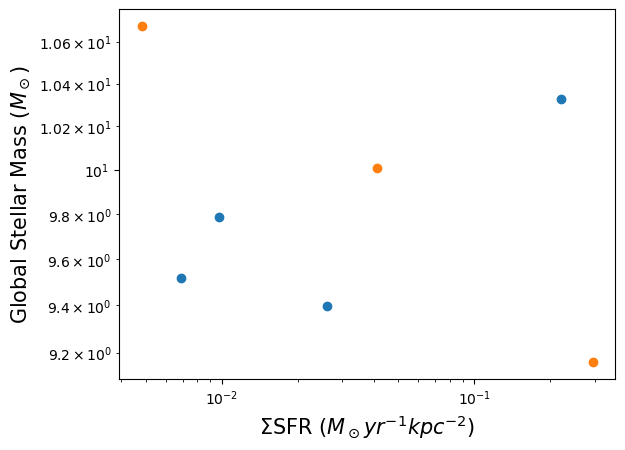

In [ ]:
plt.scatter(sfr_dens[:8], gmass_vals[:8])
plt.scatter(sfr_dens[8:12], gmass_vals[8:12])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Sigma$SFR $(M_\odot yr^{-1} kpc^{-2}$)', fontsize = 15)
plt.ylabel('Global Stellar Mass $(M_\odot)$', fontsize = 15)

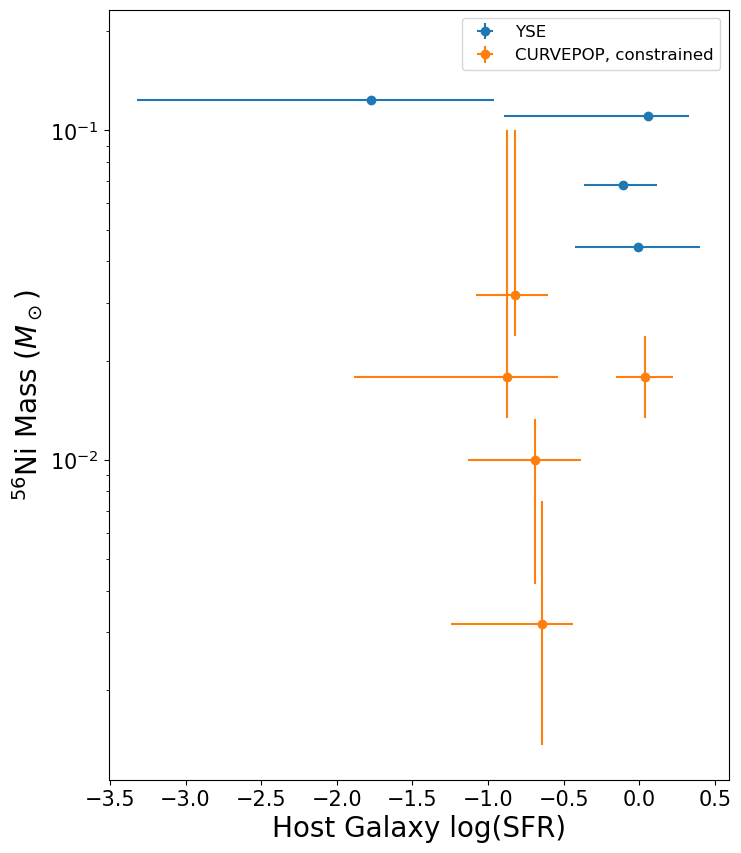

In [89]:
# hgw, jfo, jww, rth 
yse_sfr = [-1.772, -0.01, 0.0573, -0.108]
yse_sfrlow = [1.55, 0.414, 0.955, 0.258]
yse_sfrup = [0.81, 0.414, 0.274, 0.222 ]

# gd, A, et, cs, my, bk, md, A, aw, ec, ej
CURVE_sfr = [np.nan, -0.824, np.nan, np.nan, -0.872, np.nan, -0.645, -0.689, np.nan, 0.040, np.nan]
CURVE_sfrlow = [np.nan, 0.257, np.nan, np.nan, 1.017, np.nan, 0.602, 0.446, np.nan, 0.196, np.nan]
curve_sfrup = [np.nan, 0.221, np.nan, np.nan, 0.333, np.nan, 0.204, 0.305, np.nan, 0.180, np.nan]
plt.figure(figsize=(8,10))
plt.errorbar(yse_sfr, nickel_masses, xerr = [yse_sfrlow, yse_sfrup], yerr = asymmetric_y,fmt = 'o', label ='YSE')
plt.errorbar(CURVE_sfr, CURVE_cons, xerr = [CURVE_sfrlow, curve_sfrup],yerr=[cons_lower, cons_upper], fmt = 'o', label = 'CURVEPOP, constrained')
plt.xlabel('Host Galaxy log(SFR)', fontsize =20)
plt.ylabel('$^{56}$Ni Mass ($M_\odot$)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 'large')
plt.yscale('log')


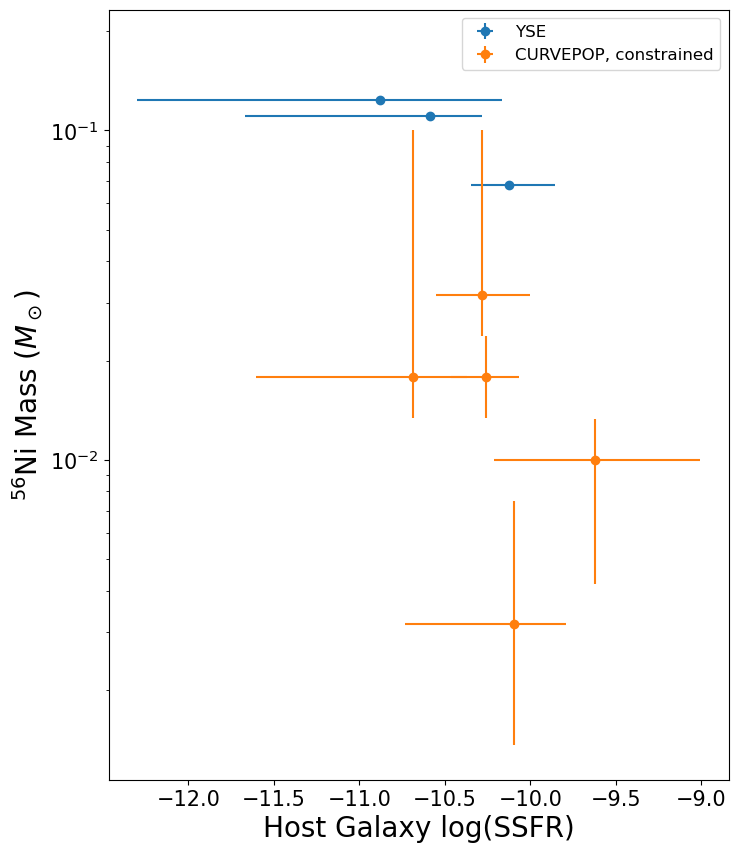

In [90]:
yse_ssfr = [-10.881, np.nan, -10.585, -10.126]
yse_ssfrlo = [1.421, np.nan, 1.082, 0.220]
yse_ssfrup = [0.713, np.nan, 0.301, 0.272]

CURVE_ssfr = [np.nan, -10.283, np.nan, np.nan, -10.686, np.nan, -10.098, -9.620, np.nan, -10.259, np.nan]
CURVE_ssfrlo = [np.nan, 0.267, np.nan, np.nan, 0.921, np.nan, 0.635, 0.591, np.nan, 0.204, np.nan]
CURVE_ssfrup = [np.nan, 0.281, np.nan, np.nan, 0.313, np.nan, 0.308, 0.616, np.nan, 0.196, np.nan]

plt.figure(figsize=(8,10))
plt.errorbar(yse_ssfr, nickel_masses, xerr = [yse_ssfrlo, yse_ssfrup], yerr = asymmetric_y,fmt = 'o', label ='YSE')
plt.errorbar(CURVE_ssfr, CURVE_cons, xerr = [CURVE_ssfrlo, CURVE_ssfrup],yerr=[cons_lower, cons_upper], fmt = 'o', label = 'CURVEPOP, constrained')
plt.xlabel('Host Galaxy log(SSFR)', fontsize =20)
plt.ylabel('$^{56}$Ni Mass ($M_\odot$)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 'large')
plt.yscale('log')

In [91]:
l_sfr

{'2004A': [-1.3488688386053, -1.0630238636139, -0.788034074270457],
 '2005cs': [0.292179349775519, 0.440528570747857, 0.723309829096759],
 '2006my': [-1.27454807856151, -0.911503048772478, -0.568104535379997],
 '2009md': [-0.75976187416605, -0.485770395951849, -0.209265383980996],
 '2012A': [0.441505467768002, 0.785857502557994, 0.995230508843101],
 '2012aw': [-0.941148498345477, -0.789496112988548, -0.577489256773648],
 '2012ec': [0.21315084227947, 0.443470862472817, 0.720938092873781],
 '2013ej': [-1.84241325821949, -1.53965859664447, -1.30181603535822],
 '2020hgw': [0.0733317312536856, 0.567605774560771, 0.901224943191011],
 '2020jfo': [-1.61850954284392, -1.26868294605755, -0.95673195832688],
 '2020jww': [-1.90724718057691, -1.21795119320222, -0.511728922064971],
 '2020rth': [-0.856483862485505, -0.286483879420259, 0.215501537303121]}

In [92]:
sfr_dens

array([0.00688238,        nan, 0.00975576, 0.02600024,        nan,
       0.01291458, 0.22090942,        nan, 0.29374779, 0.00428606,
       0.00481275, 0.04111738])

Text(0, 0.5, '$^{56}$Ni Mass ($M_\\odot$)')

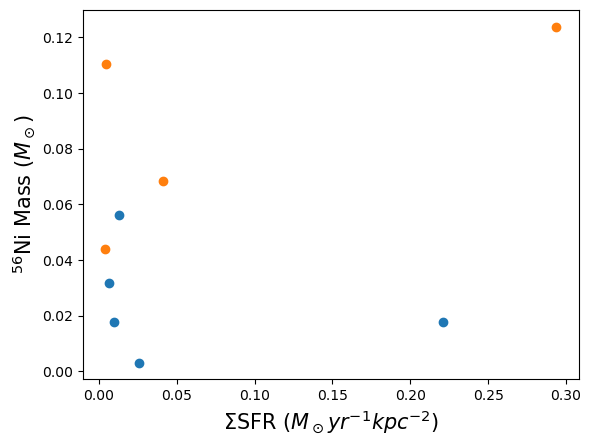

In [93]:
# want CURVEPOP 56Ni values for SNe that BLAST successfully processed 
#e.g excluding 03gd, 04et, 08bk 
#2004A, 2005cs, 2006my, 2008bk, 2009md, 2012A, 2012aw, 2012ec, 2013ej 
[10.0, 31.6, 56.2, 3.2, 17.8, 10.0, 3.16, 10.0, 56.2, 17.8, 100]
CURVE_cons_BLAST= np.array([31.6, 3.2, 17.8, 3.16, 10.0, 56.2, 17.8, 100]) * 10**-3 
CURVE_cons_notBLAST = np.array([10.0, 56.2, 10.0]) * 10 **-3
#the first 8 values in the following lists correspond to eldridge sample 
#the last 4 correspond to YSE sample 
plt.scatter(sfr_dens[:8], CURVE_cons_BLAST, label ='CURVEPOP')
plt.scatter(sfr_dens[8:13], nickel_masses, label = 'YSE')
plt.xlabel('$\Sigma$SFR $(M_\odot yr^{-1} kpc^{-2}$)', fontsize = 15)
plt.ylabel('$^{56}$Ni Mass ($M_\odot$)', fontsize = 15)
# plt.legend(loc = 'lower right')

In [94]:
g_sfr

{'2004A': [-1.26524497613557, -0.712312152638003, -0.36105276665426],
 '2005cs': [None, None, None],
 '2006my': [-0.943989193472046, -0.644020518072129, -0.36053754513032],
 '2009md': [-0.345804553874086, -0.0351719243566015, 0.205344284288772],
 '2012A': [0.172501896041789, 0.383999536702446, 0.584607821757191],
 '2012aw': [None, None, None],
 '2012ec': [0.20576852950533, 0.490265725495369, 0.761230982085752],
 '2013ej': [None, None, None],
 '2020hgw': [-0.239904489719662, 0.2779822046638, 0.681112311344142],
 '2020jfo': [None, None, None],
 '2020jww': [0.209105363947132, 0.719876895769188, 1.08794765782217],
 '2020rth': [-0.494973560357545, -0.138648917001493, 0.282355492472307]}

In [95]:
g_sfr_vals

[-0.712312152638003,
 nan,
 -0.644020518072129,
 -0.0351719243566015,
 0.383999536702446,
 nan,
 0.490265725495369,
 nan,
 0.2779822046638,
 nan,
 0.719876895769188,
 -0.138648917001493]

In [96]:
# 03gd, 04et, 08bk
total_fail_mass = [10.38, 10.54, 9.48]
total_fail_sfr = [0.230, 0.390, -0.450]

# 05cs, 12aw, 13ej, 20jfo
global_fail_mass = [10.75, 10.43, 10.38, 10.52]
global_fail_sfr = [0.46, -0.18, 0.23, -.01]

TypeError: scatter() missing 1 required positional argument: 'y'

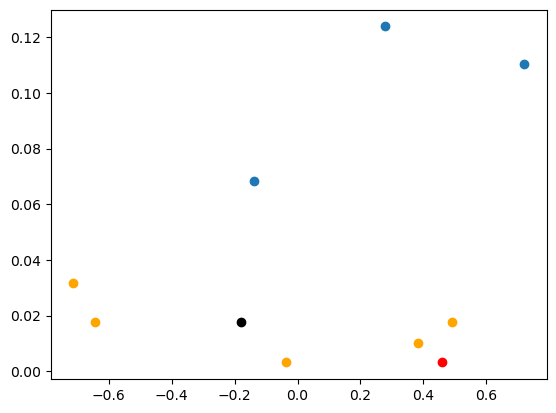

In [97]:
plt.scatter(g_sfr_vals[:8], CURVE_cons_BLAST, label = 'CURVE', color = 'orange')
plt.scatter(g_sfr_vals[8:], nickel_masses, label = 'YSE')
plt.scatter(global_fail_sfr[0], CURVE_cons_BLAST[1], color = 'red')
plt.scatter(global_fail_sfr[1], CURVE_cons_BLAST[6], color = 'k')
plt.scatter(global_fail_sfr[2], )
plt.scatter(total_fail_sfr, CURVE_cons_notBLAST, color = 'orange')
plt.xlabel('log Global SFR')
plt.ylabel('$^{56}$Ni Mass ($M_\odot$)', fontsize = 15)
plt.legend(loc = 'upper left')